In [2]:
#importing required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [4]:
#loading the Dataset

df = pd.read_csv("HR_Analytics.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# EDA(Exploratory Data Analysis)

In [5]:
#Checking rows and columns
df.shape

(1470, 35)

There are 1470 rows and 35 columns are present in dataset

In [6]:
#Checking Columns Headers

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Checking null Values of dataset both mathematical and visual way

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

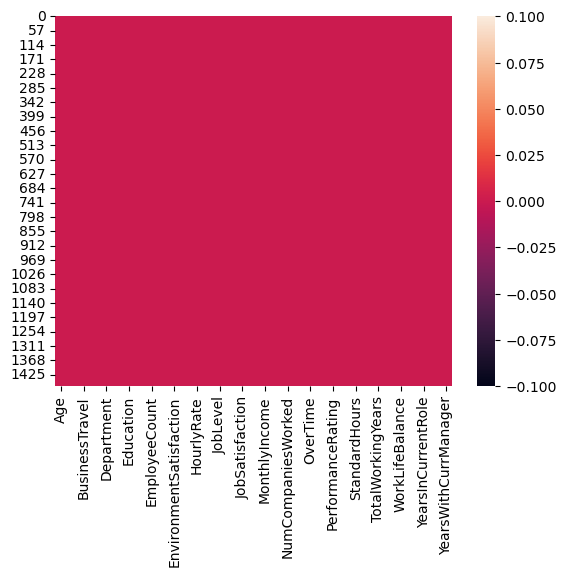

In [8]:
sns.heatmap(df.isnull())

In [9]:
#Checking for Duplicate values

df.duplicated().sum()

0

There are zero duplicate values in dataset

In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observation:
    
there is no null and missing values in dataset

there are 2 types of data found in datset

In [12]:
#Checking the dataset in statistical way

df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Observation:
    
One key observation in the data is that the "EmployeeCount" column has a constant value of 1, meaning it doesn't provide meaningful information for analysis. The same applies to the "StandardHours" column, which is consistently set at 80. Removing these columns won't affect insights.

Furthermore, the "EmployeeNumber" column contains unique values for each entry, but it doesn't contribute to predicting attrition. Therefore, it can be safely dropped from the dataset as well.

In [14]:
#Dropping certain column which doesnt affect the Analysis

df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'],axis=1, inplace=True)

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Visualization

<Axes: xlabel='Age', ylabel='Attrition'>

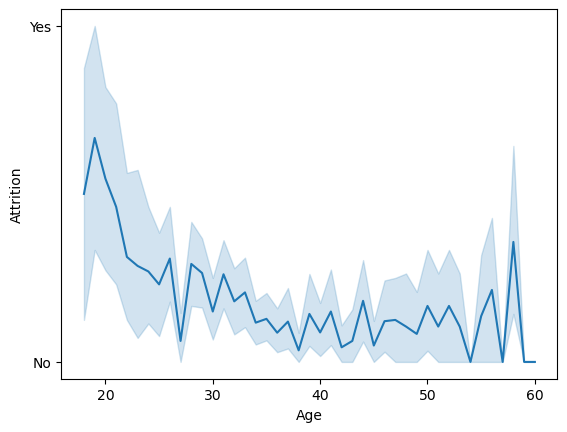

In [17]:
sns.lineplot(x='Age',y='Attrition',data=df)

Job changes and attrition are more frequent at an early age, typically after 18. Conversely, after the age of 57, job attrition becomes more common, potentially due to health conditions or retirement.

<Axes: xlabel='Attrition', ylabel='count'>

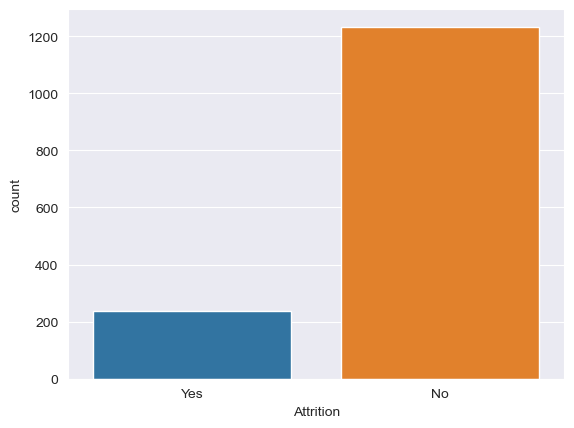

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='Attrition', data=df)

In [19]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [21]:
#Gender VS Attrition

df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<Axes: xlabel='Age', ylabel='Attrition'>

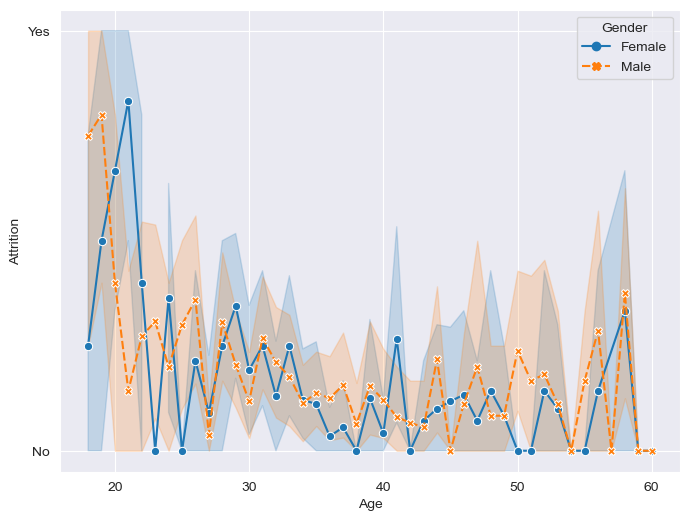

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Age',y='Attrition',hue='Gender',style='Gender',markers=True,data=df)

<Axes: xlabel='Age', ylabel='DistanceFromHome'>

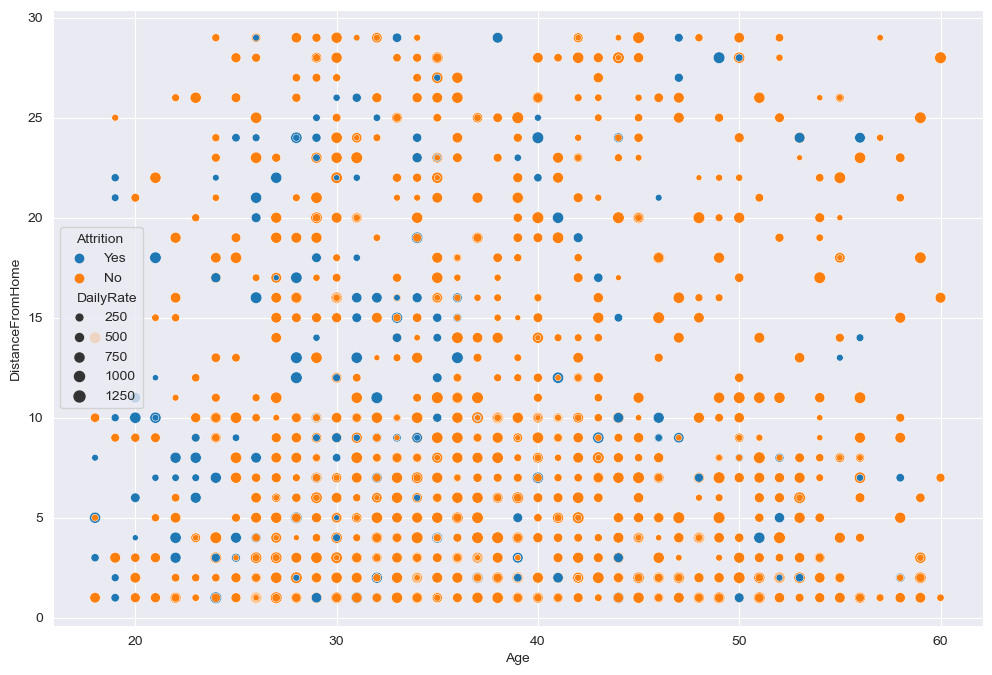

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='DistanceFromHome',hue='Attrition', size='DailyRate', data=df)

In [31]:
#JobRole vs MonthlyIncome

df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [35]:
#Target Column

df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [37]:
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

In [38]:
#Separating Numerical And Categorical Columns

numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [39]:
numerical_columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [40]:
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

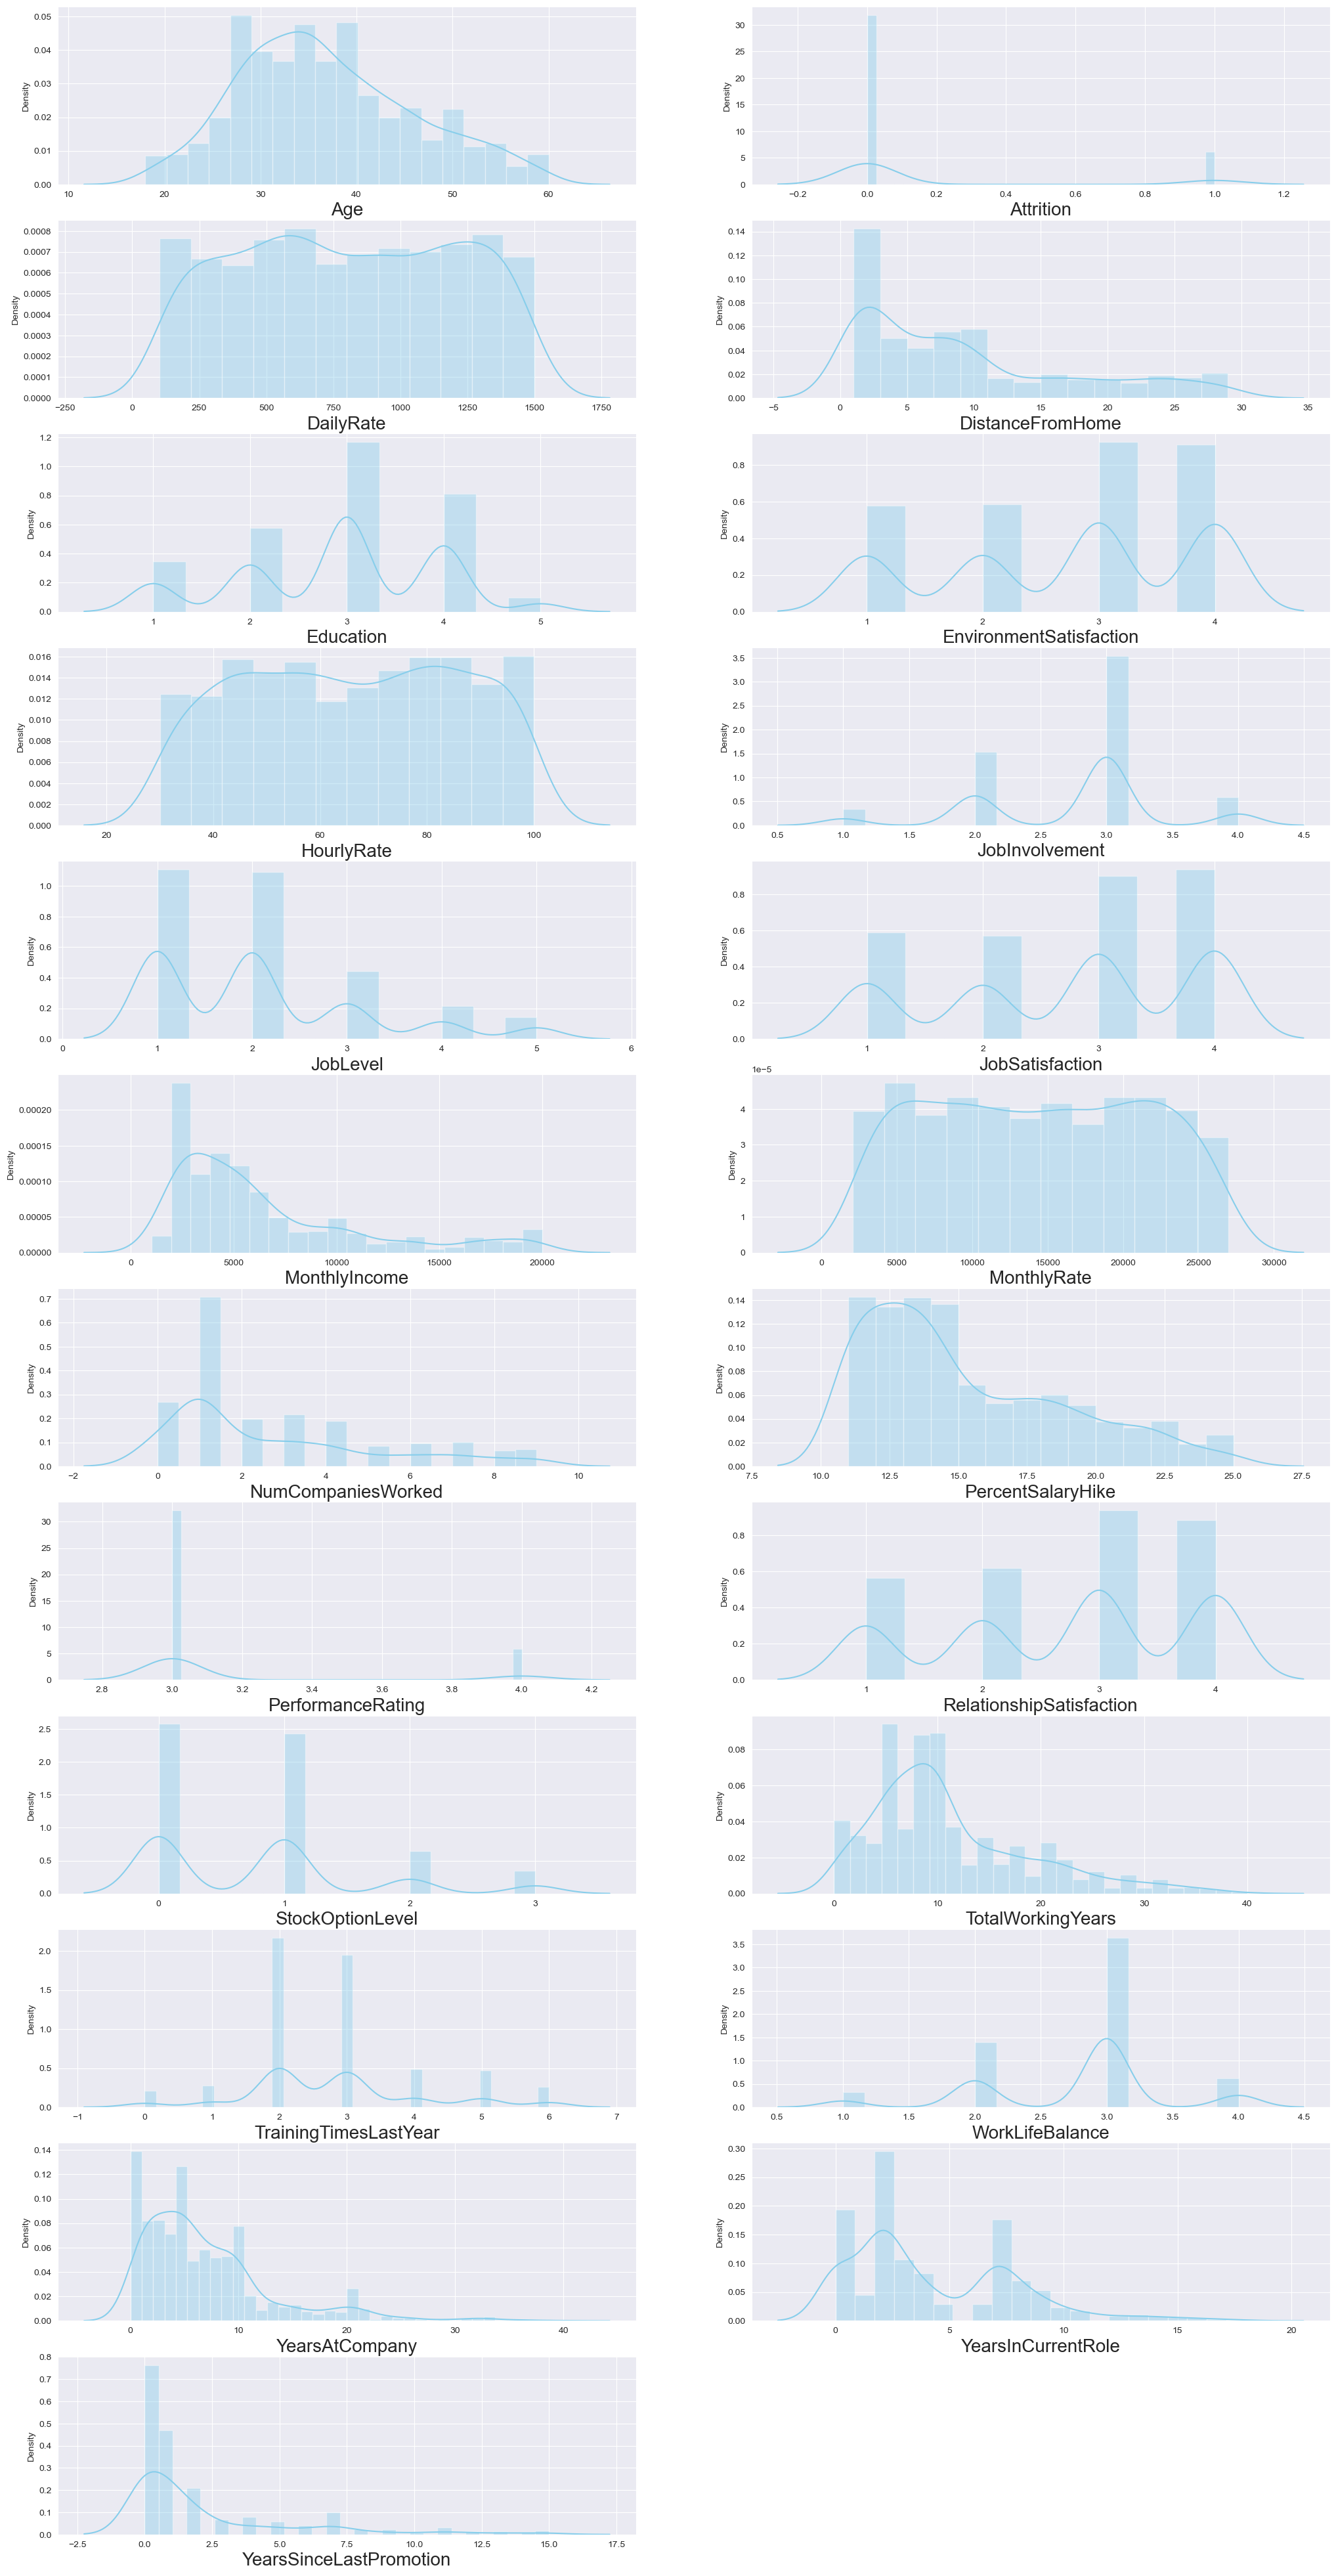

In [42]:
#Distribution plot Seeing Distribution

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

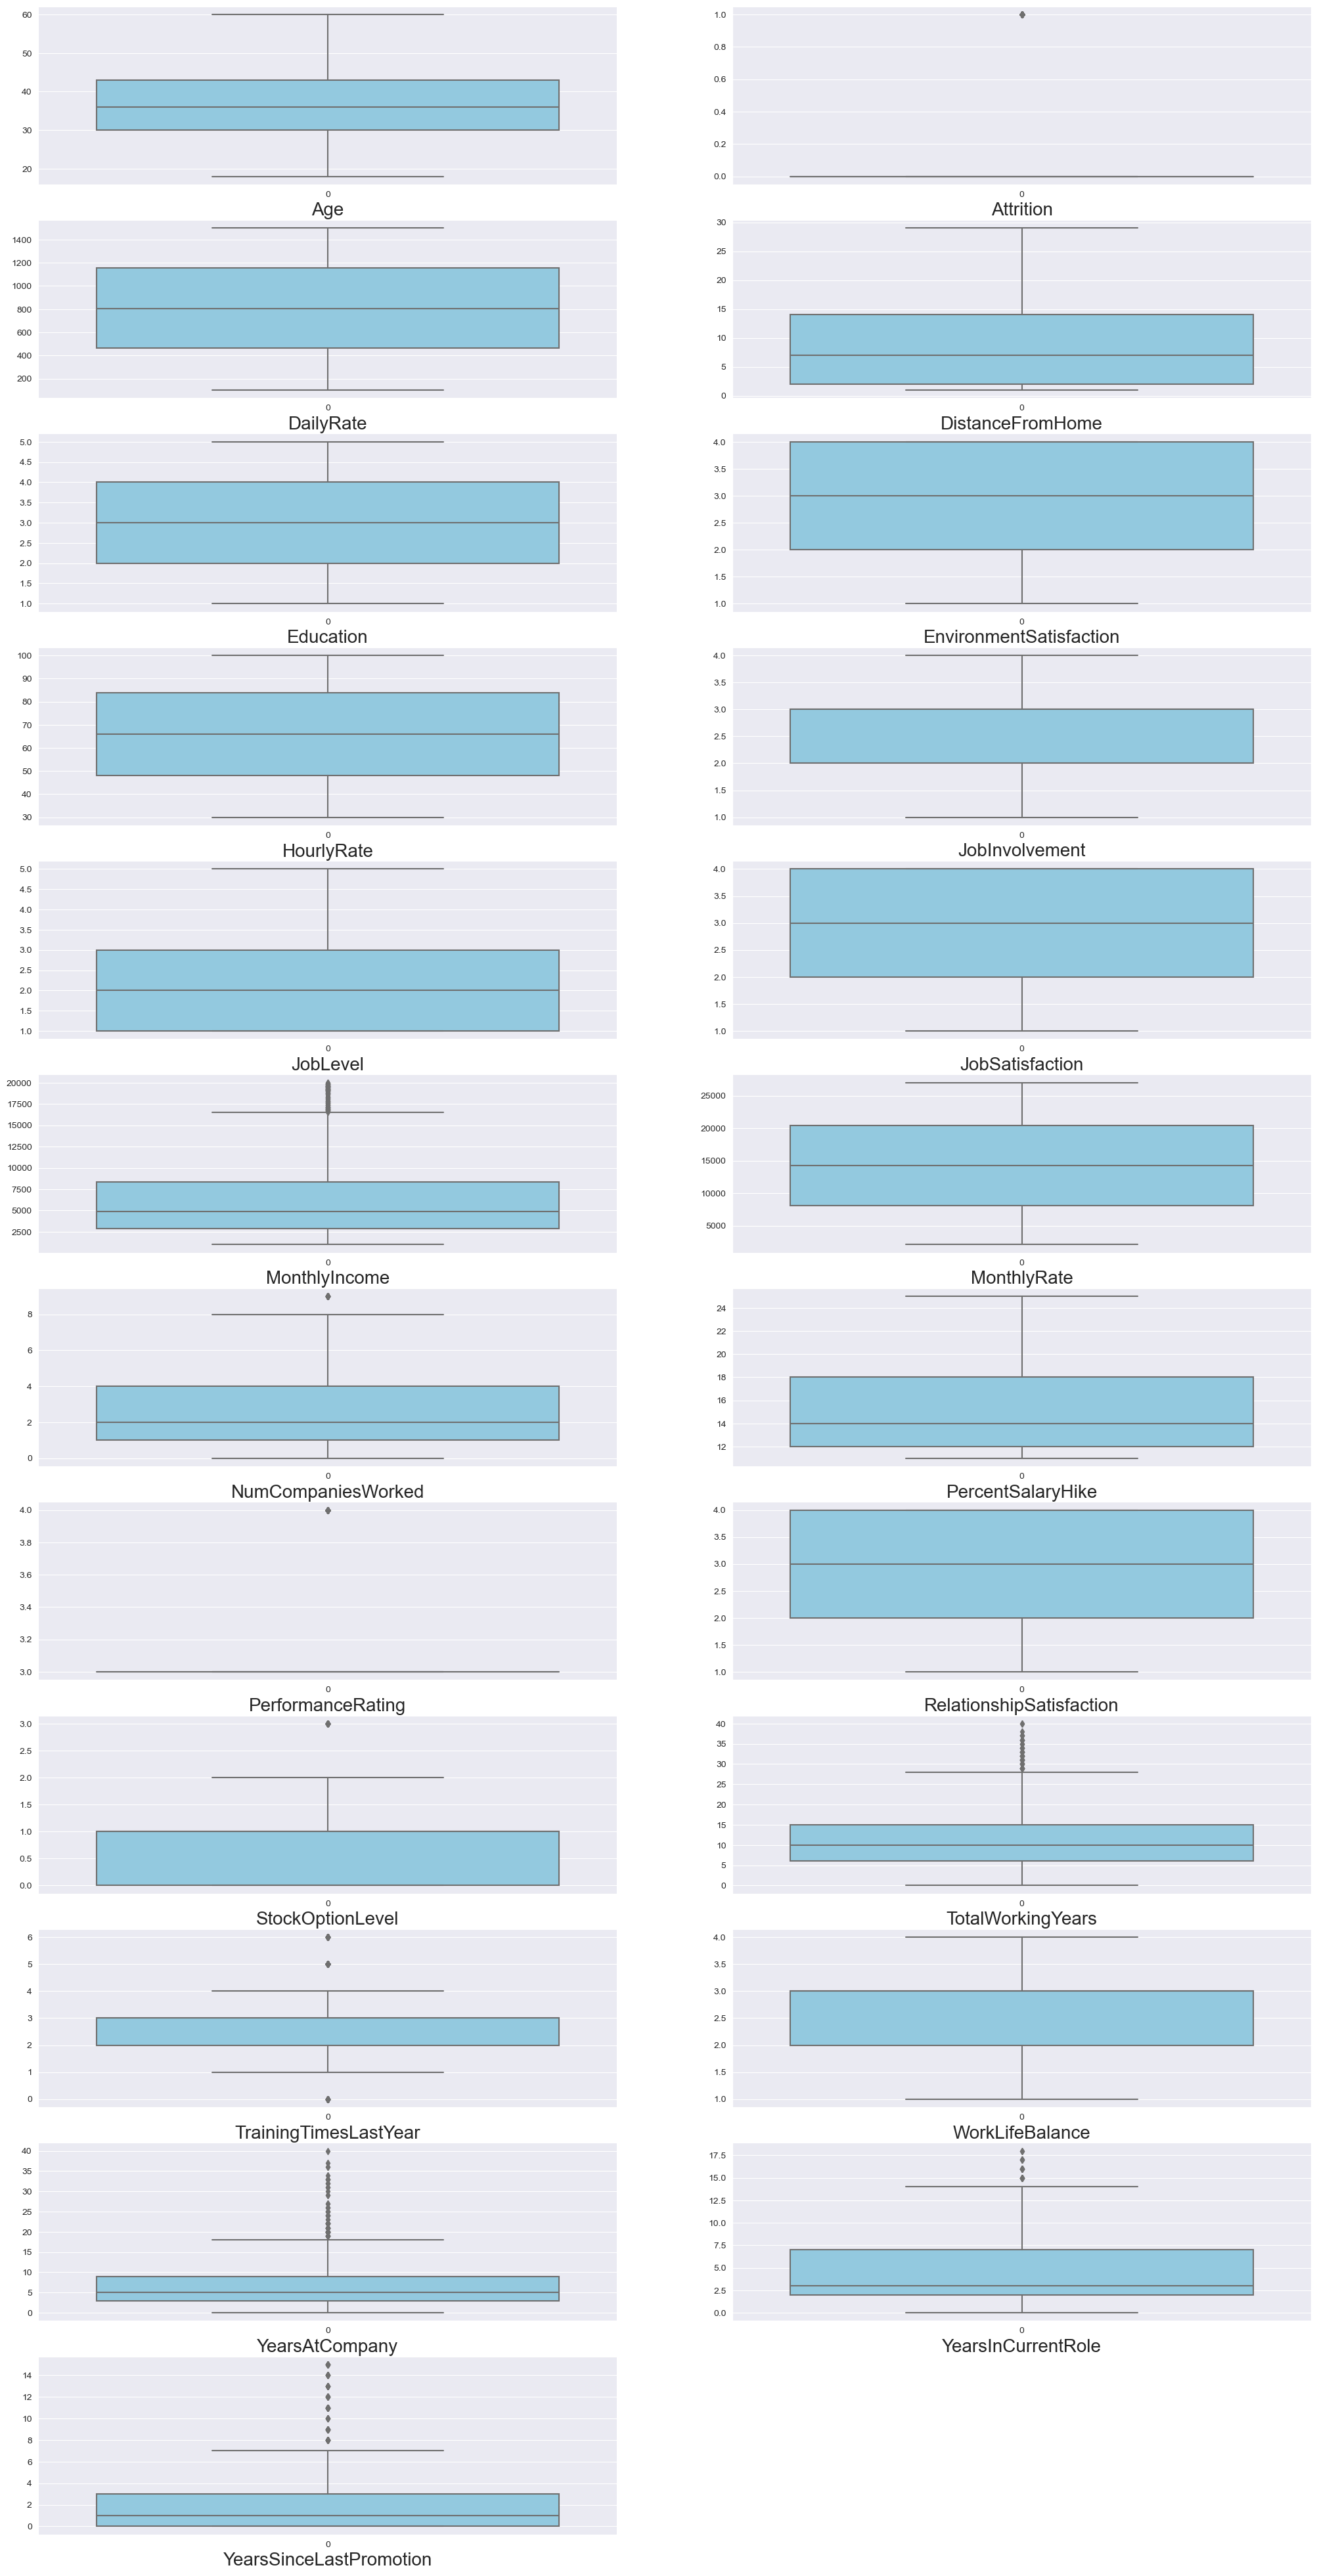

In [43]:
#BoxPlot for seeing Outliers

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

It appears that some features in the dataset exhibit outliers. Let's assess whether these observations are indeed outliers or not:

- 'MonthlyIncome': Some individuals in high-ranking positions have notably high incomes, which could be considered valid.
- 'NumCompaniesWorked': If a person commenced their career at 18, they might change jobs yearly, which is reasonable.
- 'PerformanceRating': This does not appear to be an outlier.
- 'PercentSalaryHike': A 25% salary hike may be justified for certain employees and should not be treated as an outlier.
- 'TotalWorkingYears': If someone started working at 18 and continues until age 58, accumulating 18 years of experience is expected.
- 'StockOptionLevel': This feature does not seem to contain outliers.
- 'TrainingTimesLastYear': No outliers detected in this feature.
- 'YearsAtCompany': Outliers are not evident.
- 'YearsInCurrentRole': It does not seem to contain outliers, as very few individuals have 20 years of experience in their current role.
- 'YearsSinceLastPromotion': Since this is a categorical feature, it does not have outliers.
- 'YearsWithCurrManager': If 'YearsAtCompany' exceeds 16, 'YearsWithCurrManager' could be capped at 16, but no outliers are identified.

In summary, the dataset does not appear to contain significant outliers.

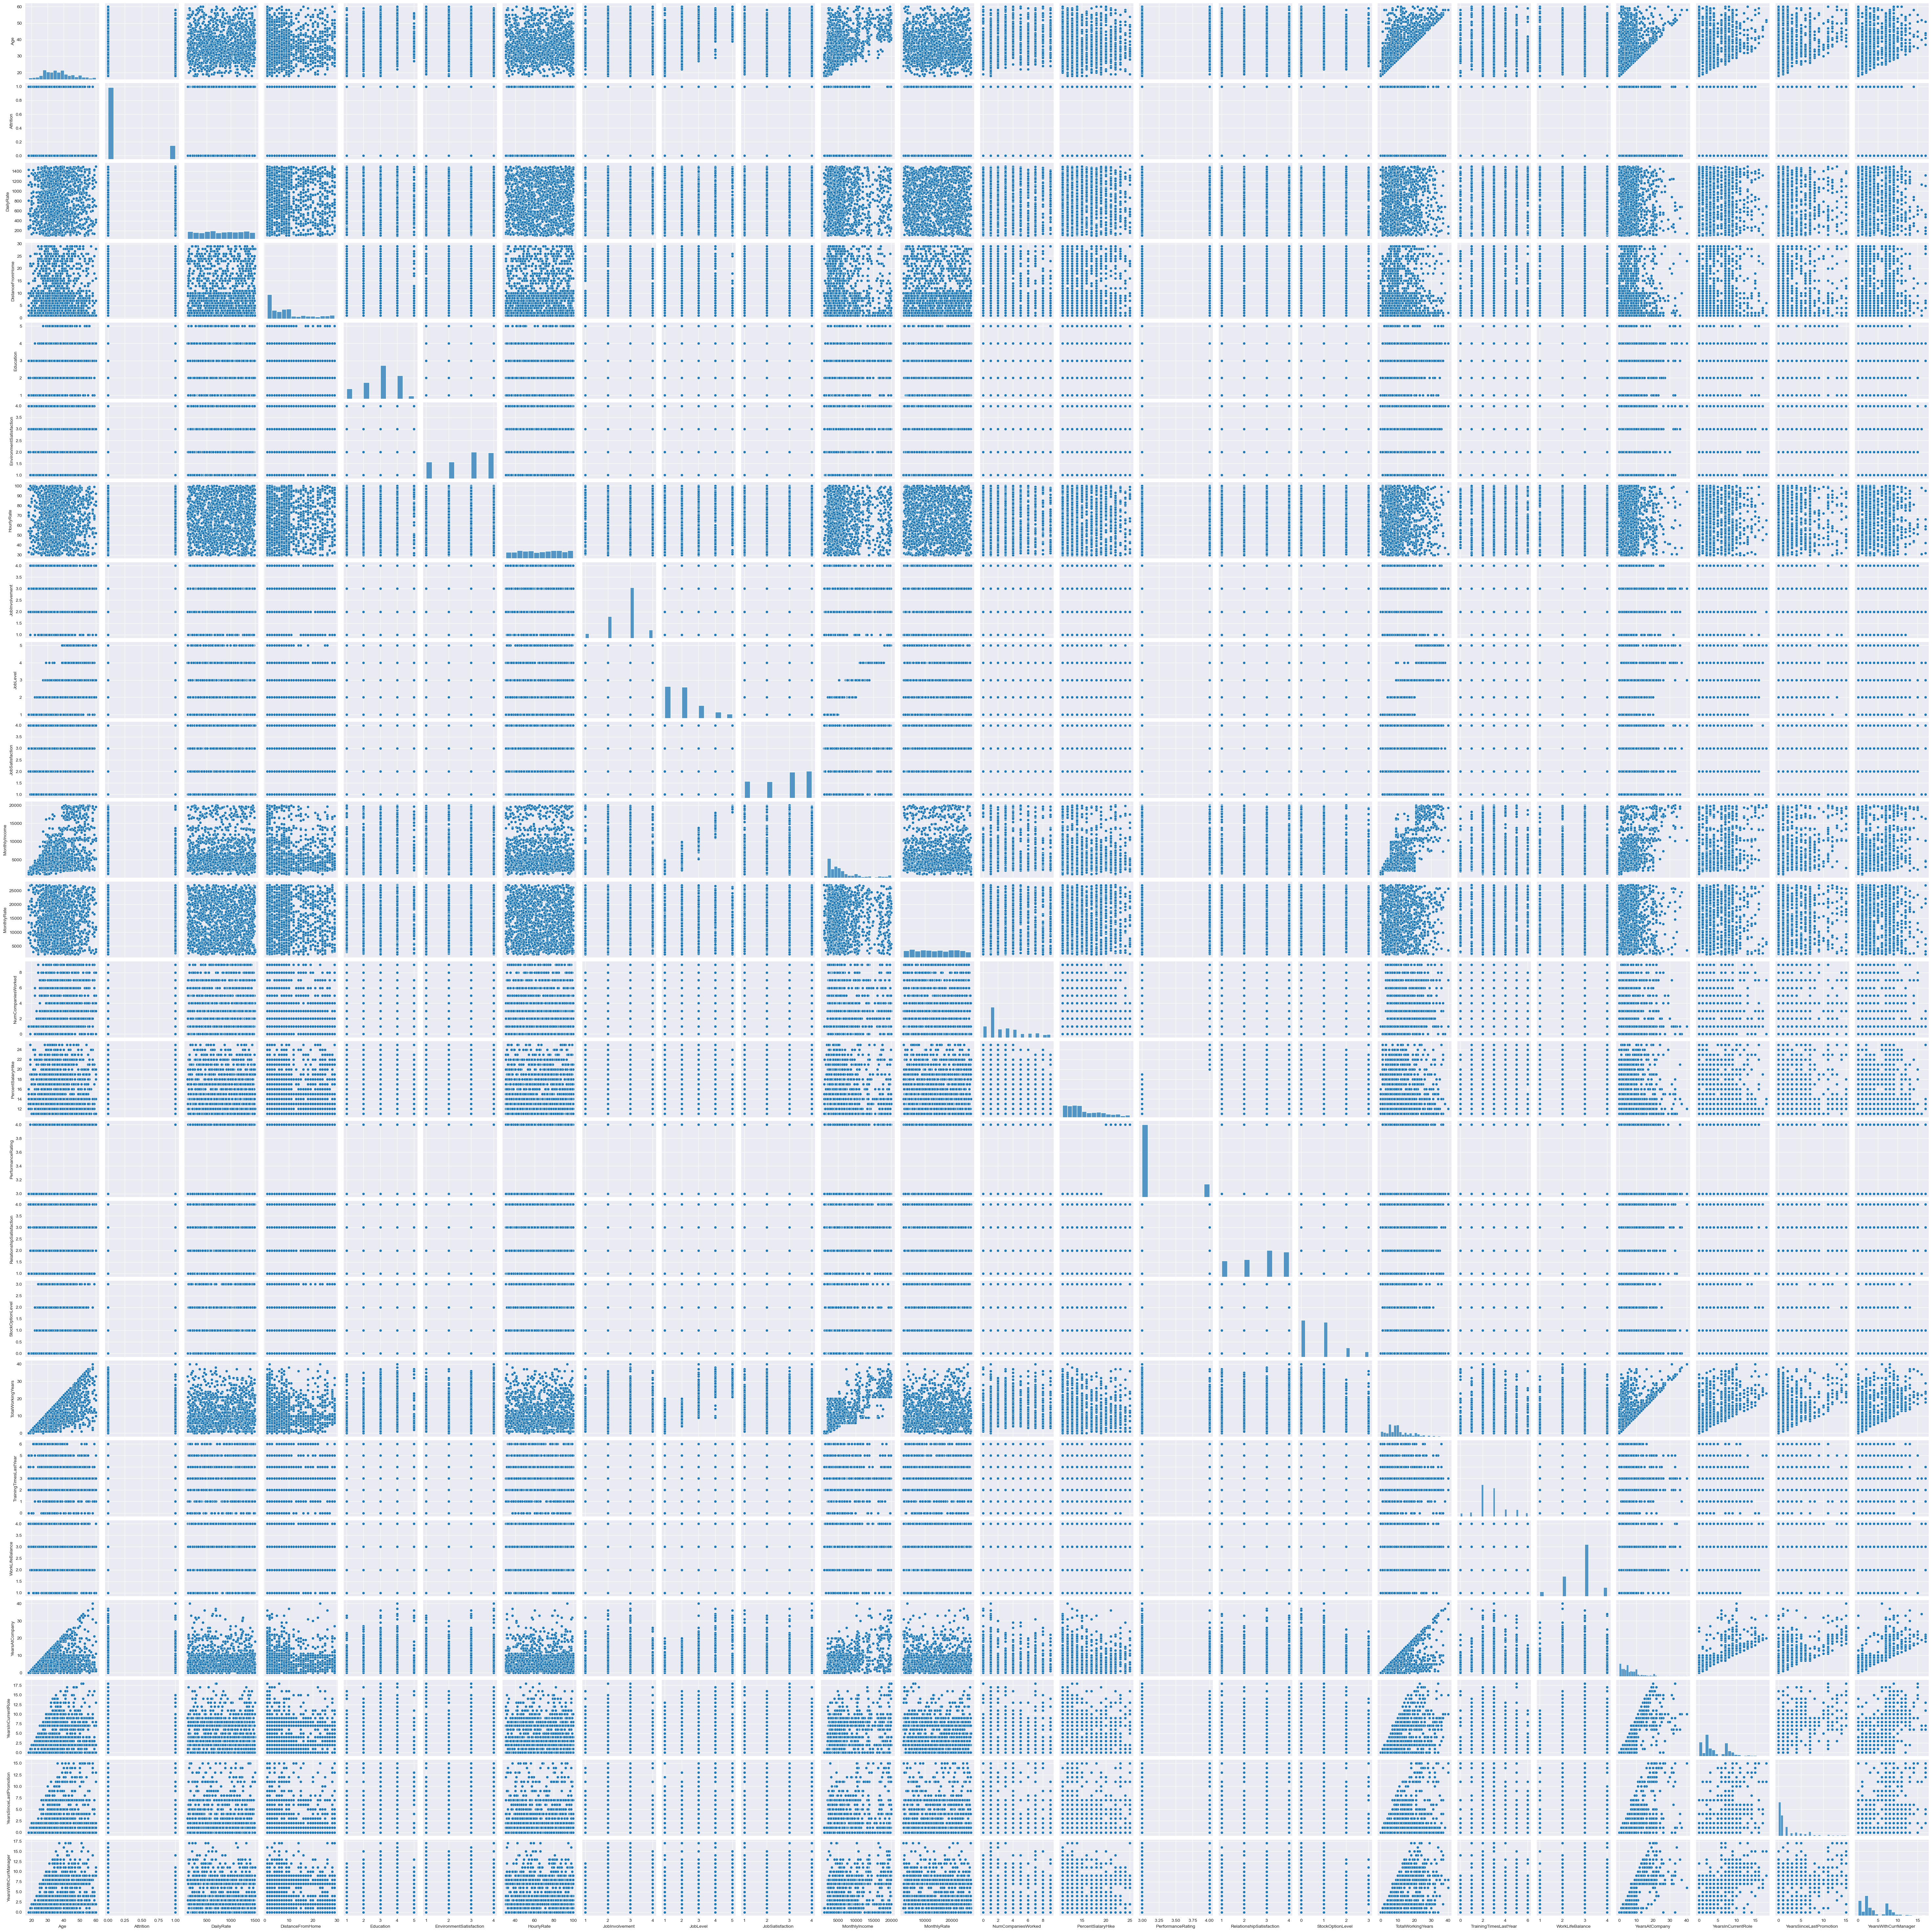

In [44]:
#load the Pairplot

sns.pairplot(df)

<Axes: >

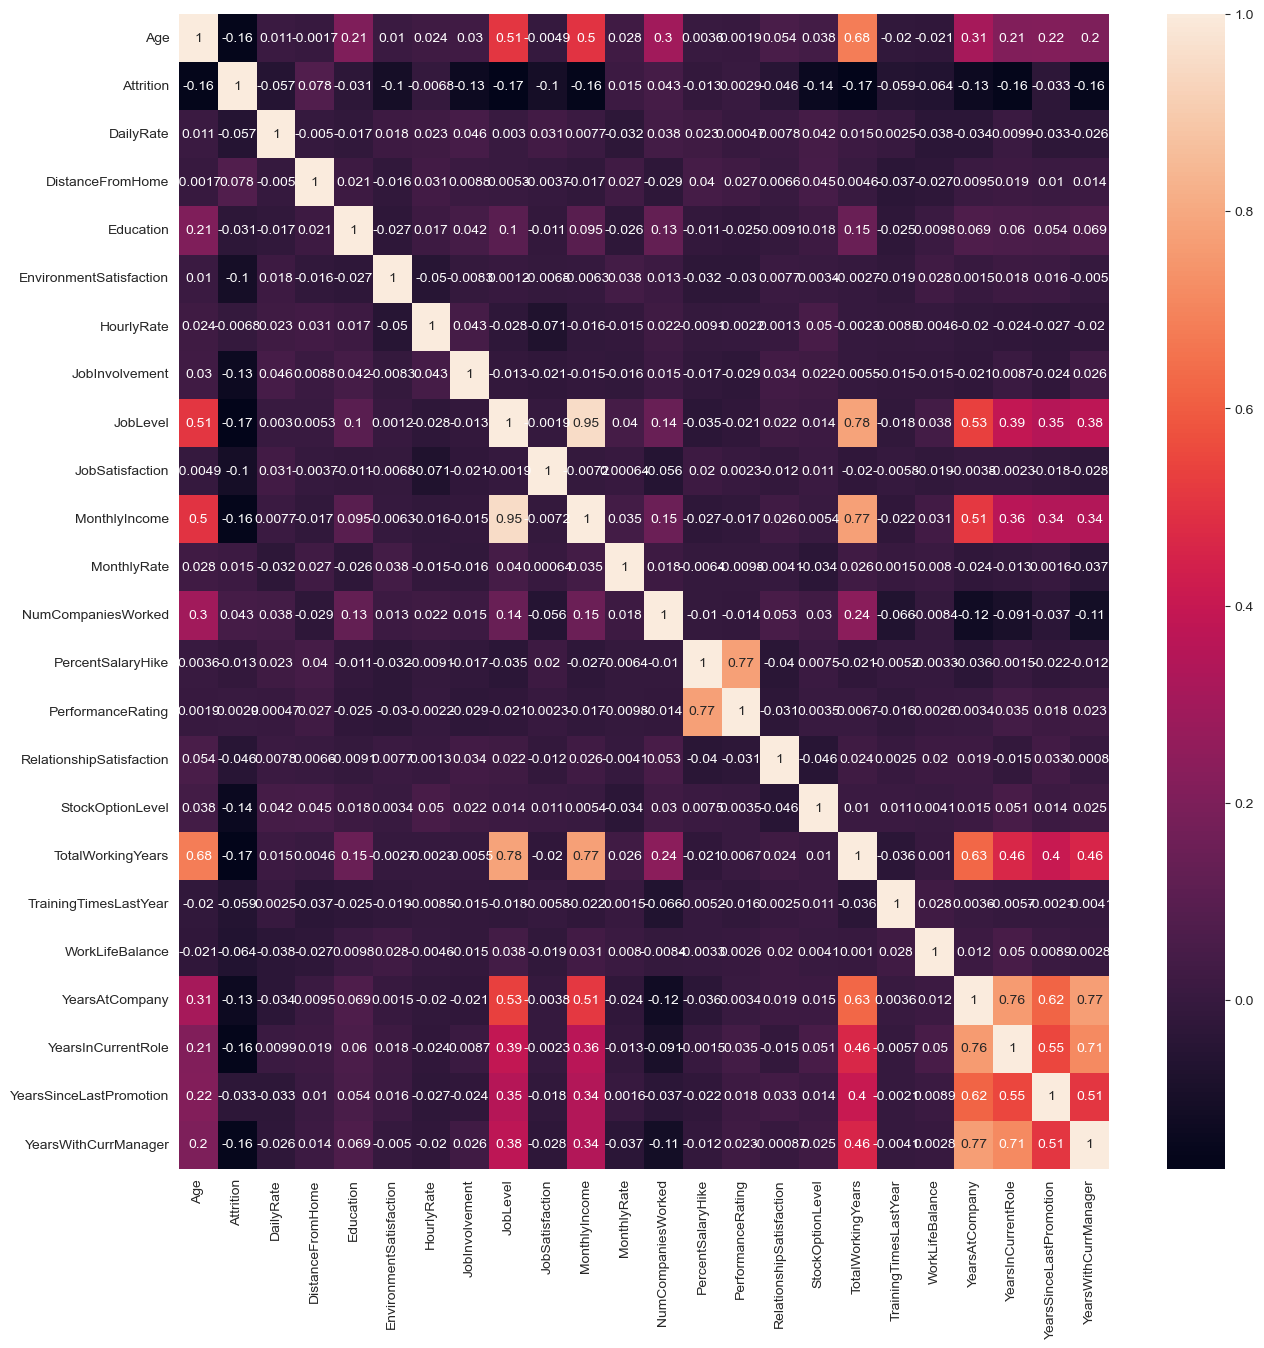

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Many features exhibit low correlation with the target variable, while some show strong correlations. Notably, Monthly Income and Job Level display a high correlation. Additionally, Total Working Years exhibit strong correlations with both Job Level and Monthly Income. Similarly, Years at Company and Years in Current Role are also highly correlated.

In [46]:
df_corr=df.corr()
df_corr

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

In [47]:
#Checking Correlation with Target Column

correlation_with_quality = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Attrition                   1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
HourlyRate                  0.006846
PerformanceRating           0.002889
Name: Attrition, dtype: float64


In [48]:
df.drop(columns=['PerformanceRating' , 'HourlyRate'],axis=1, inplace=True)

In [49]:
#Checkimng correlation after dropping
df_corr = df.corr()
df_corr

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  JobInvolvement  \
Age                        0.208034                 0.010146        0.029820   
Attrition                 -0.031373                -0.103369       -0.130016   
DailyRate                 -0.016806                 0.018355        0.046135   
DistanceFromHome           0.021042                -0.016075        0.008783   
Education                  1.000000                -0.027128        0.042438   
EnvironmentSatisfaction   -0.027128                 1.000000       -0.008278   
JobInvolvement             0.042438                -0.008278        1.000000   
JobLevel                   0.101589                 0.001212       -0.012630   
JobSatisfaction           -0.011296                -0.006784       -0.021476   
MonthlyIncome              0.094961                -0.006259       -0.015271   
MonthlyRate               -0.026084                 0.037600       -0.016322   
NumCompaniesWorked         0.126317                 0.012594        0.015012   
PercentSalaryHike         -0.011111                -0.031701       -0.017205   
RelationshipSatisfaction  -0.009118                 0.007665        0.034297   
StockOptionLevel           0.018422                 0.003432        0.021523   
TotalWorkingYears          0.148280                -0.002693       -0.005533   
TrainingTimesLastYear     -0.025100                -0.019359       -0.015338   
WorkLifeBalance            0.009819                 0.027627       -0.014617   
YearsAtCompany             0.069114                 0.001458       -0.021355   
YearsInCurrentRole         0.060236                 0.018007        0.008717   
YearsSinceLastPromotion    0.054254                 0.016194       -0.024184   
YearsWithCurrManager       0.069065                -0.004999        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
Attrition                -0.169105        -0.103481      -0.159840  ...   
DailyRate                 0.002966         0.030571       0.007707  ...   
DistanceFromHome          0.005303        -0.003669      -0.017014  ...   
Education           

In [51]:
#Checking whoich columns are highly correlate each other

correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [52]:
features_to_drop

{'MonthlyIncome'}

In [53]:
df.drop(columns=['MonthlyIncome'],axis=1, inplace=True)

In [55]:
#VIF

num=df.select_dtypes(np.number)

In [56]:
num.drop('Attrition',axis=1, inplace=True)

In [57]:
num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [58]:
sc=StandardScaler()
standard=sc.fit_transform(num)

In [59]:
standard=pd.DataFrame(standard, columns=num.columns)

In [60]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [61]:
VIF

features       vif
0                        Age  2.037714
1                  DailyRate  1.016883
2           DistanceFromHome  1.009272
3                  Education  1.058291
4    EnvironmentSatisfaction  1.006980
5             JobInvolvement  1.014382
6                   JobLevel  2.627306
7            JobSatisfaction  1.008788
8                MonthlyRate  1.012015
9         NumCompaniesWorked  1.257646
10         PercentSalaryHike  1.010146
11  RelationshipSatisfaction  1.015550
12          StockOptionLevel  1.015005
13         TotalWorkingYears  4.651463
14     TrainingTimesLastYear  1.009370
15           WorkLifeBalance  1.014725
16            YearsAtCompany  4.583306
17        YearsInCurrentRole  2.714710
18   YearsSinceLastPromotion  1.670784
19      YearsWithCurrManager  2.757026

In [62]:
df.head(2)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  ...  PercentSalaryHike  RelationshipSatisfaction StockOptionLevel  \
0  Female  ...                 11                         1                0   
1    Male  ...                 23                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                     0                1               6   
1                 10                     3                3              10   

  YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                       0                     5  
1                  7                       1                     7  

[2 rows x 29 columns]

In [63]:
#Splitting into Feature and Target column

X= df.drop('Attrition', axis=1)
Y=df['Attrition']

In [64]:
#Handle categorical features

X=pd.get_dummies(X,drop_first=True)

In [65]:
#removing Skewness


X.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion              1.984290
YearsWithCurrManager                 0.833451
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely      

In [66]:
transformed=power_transform(X)

In [67]:
pd.DataFrame(transformed).skew()


0    -0.007603
1    -0.196160
2    -0.007468
3    -0.099881
4    -0.205395
5    -0.020365
6     0.103624
7    -0.212815
8    -0.184087
9     0.014814
10    0.116250
11   -0.193634
12    0.087019
13   -0.010653
14    0.058058
15   -0.012286
16   -0.008683
17   -0.060849
18    0.212129
19   -0.067565
20    1.595067
21   -0.923992
22   -0.646936
23    0.856158
24    0.356919
25    2.525783
26    0.794118
27    3.875119
28    2.872604
29   -0.408665
30    5.035637
31    1.701604
32    3.392611
33    2.694844
34    3.932443
35    1.512214
36    1.340834
37    3.847192
38    0.169484
39    0.773874
40    0.964489
dtype: float64

In [69]:
#Standarization

sc=StandardScaler()


In [70]:
X=sc.fit_transform(transformed)

In [71]:
#Data Balancing

In [72]:
sm=SMOTE()


In [73]:
x,y=sm.fit_resample(X,Y)


In [74]:
x.shape , y.shape


((2466, 41), (2466,))

In [75]:
#Model Training
#Find best Randomstate

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8441295546558705 on Random State = 89


In [76]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [77]:
#Defining All Regression Models

LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [79]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 84.41295546558705
Confusion Matrix of  LogisticRegression()  is 
 [[195  47]
 [ 30 222]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       242
           1       0.83      0.88      0.85       252

    accuracy                           0.84       494
   macro avg       0.85      0.84      0.84       494
weighted avg       0.85      0.84      0.84       494

******************************
Accuracy_Score of  RidgeClassifier() is 83.60323886639675
Confusion Matrix of  RidgeClassifier()  is 
 [[191  51]
 [ 30 222]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       242
           1       0.81      0.88      0.85       252

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

******************************
Accuracy_Score of  Decisio

In [80]:
#CrossValidation

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.41295546558705
cross Validation accuracy score of  LogisticRegression()  is  80.12999811120875
**************************************************
Accuracy_Score of  RidgeClassifier() is 83.60323886639675
cross Validation accuracy score of  RidgeClassifier()  is  80.13049083936241
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 87.04453441295547
cross Validation accuracy score of  DecisionTreeClassifier()  is  85.61012063627629
**************************************************
Accuracy_Score of  SVC() is 93.31983805668015
cross Validation accuracy score of  SVC()  is  92.90463246585804
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 79.55465587044534
cross Validation accuracy score of  KNeighborsClassifier()  is  80.77908533230408
**************************************************
Accuracy_Score of  RandomForestClassifier() is 95.54655870445345

In [81]:
#Hyperparameter tuning on RandomForest

n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [82]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [83]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=282, n_estimators=200)

In [84]:
grid_search.best_params_

{'max_depth': 282,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [85]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.951417004048583

In [87]:
#Saving the Model

joblib.dump(grid_search.best_estimator_,"HR_Analytics.pkl")

['HR_Analytics.pkl']